In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [10]:
def load(path: str) -> pd.DataFrame | None:
    """
    Function that load data from a csv file and return the panda dataFrame
    Return None if there was a problem
    """
    try:
        df = pd.read_csv(path)
        print("Loading dataset of dimensions", df.shape)
        return (df)
    except Exception as e:
        print(e)
        return None



In [11]:
df = load("data.csv", )

Loading dataset of dimensions (24, 2)


In [12]:
df

,km,price
0,240000,3650
1,139800,3800
2,150500,4400
3,185530,4450
4,176000,5250
5,114800,5350
6,166800,5800
7,89000,5990
8,144500,5999
9,84000,6200


In [15]:
mileage = df.loc[:,'km']

In [16]:
mileage

0     240000
1     139800
2     150500
3     185530
4     176000
5     114800
6     166800
7      89000
8     144500
9      84000
10     82029
11     63060
12     74000
13     97500
14     67000
15     76025
16     48235
17     93000
18     60949
19     65674
20     54000
21     68500
22     22899
23     61789
Name: km, dtype: int64

In [17]:
price = df.loc[:,'price']

In [18]:
price

0     3650
1     3800
2     4400
3     4450
4     5250
5     5350
6     5800
7     5990
8     5999
9     6200
10    6390
11    6390
12    6600
13    6800
14    6800
15    6900
16    6900
17    6990
18    7490
19    7555
20    7990
21    7990
22    7990
23    8290
Name: price, dtype: int64

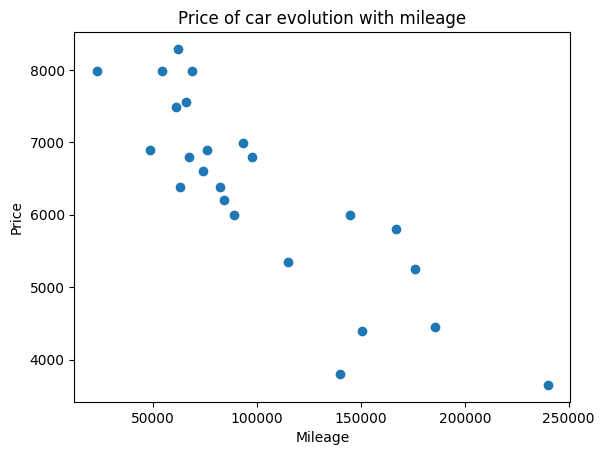

In [21]:
plt.plot(mileage, price, 'o')
plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Price of car evolution with mileage")
plt.show()

In [23]:
theta1 = 0

In [24]:
theta0 = 0

In [25]:
price

0     3650
1     3800
2     4400
3     4450
4     5250
5     5350
6     5800
7     5990
8     5999
9     6200
10    6390
11    6390
12    6600
13    6800
14    6800
15    6900
16    6900
17    6990
18    7490
19    7555
20    7990
21    7990
22    7990
23    8290
Name: price, dtype: int64

In [26]:
mileage * theta1

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
Name: km, dtype: int64

In [27]:
sum(mileage)

2425590

In [32]:
def calculateCostSquareError(theta0: float, theta1:float, df:pd.DataFrame) -> float:
    mileage = df.loc[:,'km']
    price = df.loc[:,'price']
    return(1/(2*len(df)) * sum((theta1*mileage + theta0 - price)**2))

In [33]:
len(mileage)

24

In [42]:
calculateCostSquareError(8000, -0.02, df)

287974.2732499999

In [37]:
calculateCostSquareError(0, 0, df)

20880519.291666664

In [43]:
min(mileage)

22899

In [44]:
max(mileage)

240000

In [72]:
def plotDataSetAndRegLin(mileage, price, theta0, theta1):
    x = np.linspace(min(mileage), max(mileage), 2)
    fig, ax = plt.subplots()
    plt.plot(mileage, price, 'o')
    plt.plot(x, theta1*x + theta0, 'r' ,  label="Reg Linear")
    plt.xlabel("Mileage")
    plt.ylabel("Price")
    plt.title("Evolution of the price of car with mileage")
    plt.legend()
    plt.show()

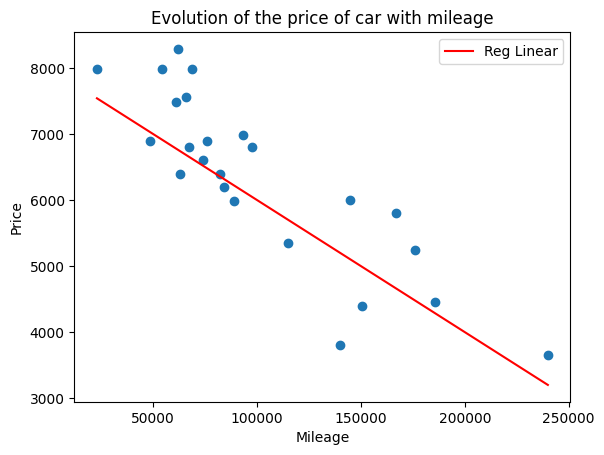

In [73]:
plotDataSetAndRegLin(mileage, price, theta0, theta1)

In [74]:
theta0 = 8000

In [75]:
theta1 = -0.02

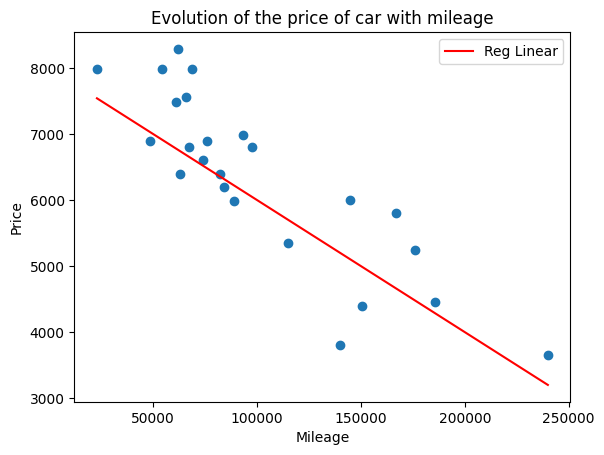

In [76]:
plotDataSetAndRegLin(mileage, price, theta0, theta1)

In [89]:
alpha = 0.01

In [87]:
sum(theta1 * mileage + theta0 - price)/24

-6331.833333333333

In [83]:
theta1 = 0

In [84]:
theta0 = 0

In [92]:
temptheta0 = theta0 - alpha * (1/len(mileage)) * sum(theta1 * mileage + theta0 - price)

In [91]:
temptheta0

63.31833333333333

In [93]:
(theta1 * mileage + theta0 - price) * mileage

0    -876000000
1    -531240000
2    -662200000
3    -825608500
4    -924000000
5    -614180000
6    -967440000
7    -533110000
8    -866855500
9    -520800000
10   -524165310
11   -402953400
12   -488400000
13   -663000000
14   -455600000
15   -524572500
16   -332821500
17   -650070000
18   -456508010
19   -496167070
20   -431460000
21   -547315000
22   -182963010
23   -512230810
dtype: int64

In [95]:
temptheta1 = theta1 - alpha * (1/len(mileage)) * sum((theta1 * mileage + theta0 - price) * mileage)

In [96]:
temptheta1

5829025.254166666

In [97]:
theta1 = temptheta1

In [98]:
theta0 = temptheta0

In [103]:
result = pd.DataFrame(columns=['theta0', 'theta1'])

In [104]:
result

,theta0,theta1


In [105]:
list_row = [27000, 2000]
result.loc[len(result)] = list_row


In [107]:
result

,theta0,theta1
0,27000,2000


In [108]:
df = load("data.csv")
mileage = df.loc[:,'km']
price = df.loc[:,'price']
theta0 = 8000
theta1 = -1/50
alpha = 0.01
print(theta1)
result = pd.DataFrame(columns=['theta0', 'theta1', "cost"])
result.loc[len(result)] = [theta0, theta1, calculateCostSquareError(theta0, theta1, df)]

Loading dataset of dimensions (24, 2)
-0.02


In [109]:
result

,theta0,theta1,cost
0,8000.0,-0.02,287974.27325


In [119]:
def updateParams(mileage, price, theta0, theta1, alpha):
    temptheta0 = theta0 - alpha * (1/len(mileage)) * sum(theta1 * mileage + theta0 - price)
    temptheta1 = theta1 - alpha * (1/len(mileage)) * sum((theta1 * mileage + theta0 - price) @ mileage)
    theta0 = temptheta0
    theta1 = temptheta1
    return (theta0, theta1)


In [120]:
mileage

0     240000
1     139800
2     150500
3     185530
4     176000
5     114800
6     166800
7      89000
8     144500
9      84000
10     82029
11     63060
12     74000
13     97500
14     67000
15     76025
16     48235
17     93000
18     60949
19     65674
20     54000
21     68500
22     22899
23     61789
Name: km, dtype: int64

In [121]:
price

0     3650
1     3800
2     4400
3     4450
4     5250
5     5350
6     5800
7     5990
8     5999
9     6200
10    6390
11    6390
12    6600
13    6800
14    6800
15    6900
16    6900
17    6990
18    7490
19    7555
20    7990
21    7990
22    7990
23    8290
Name: price, dtype: int64

In [122]:
len(mileage)

24

In [123]:
theta1 * mileage

0    -4800.00
1    -2796.00
2    -3010.00
3    -3710.60
4    -3520.00
5    -2296.00
6    -3336.00
7    -1780.00
8    -2890.00
9    -1680.00
10   -1640.58
11   -1261.20
12   -1480.00
13   -1950.00
14   -1340.00
15   -1520.50
16    -964.70
17   -1860.00
18   -1218.98
19   -1313.48
20   -1080.00
21   -1370.00
22    -457.98
23   -1235.78
Name: km, dtype: float64

In [124]:
theta1

-0.02

In [117]:
theta1 * mileage + theta0 

0     3200.00
1     5204.00
2     4990.00
3     4289.40
4     4480.00
5     5704.00
6     4664.00
7     6220.00
8     5110.00
9     6320.00
10    6359.42
11    6738.80
12    6520.00
13    6050.00
14    6660.00
15    6479.50
16    7035.30
17    6140.00
18    6781.02
19    6686.52
20    6920.00
21    6630.00
22    7542.02
23    6764.22
Name: km, dtype: float64

In [118]:
theta0

8000

In [127]:
(theta1 * mileage + theta0 - price)

0    -1.080000e+08
1     1.962792e+08
2     8.879500e+07
3    -2.979612e+07
4    -1.355200e+08
5     4.063920e+07
6    -1.894848e+08
7     2.047000e+07
8    -1.284605e+08
9     1.008000e+07
10   -2.508447e+06
11    2.199533e+07
12   -5.920000e+06
13   -7.312500e+07
14   -9.380000e+06
15   -3.196851e+07
16    6.526196e+06
17   -7.905000e+07
18   -4.321162e+07
19   -5.703656e+07
20   -5.778000e+07
21   -9.316000e+07
22   -1.025829e+07
23   -9.427642e+07
dtype: float64

In [130]:
mileage

0     240000
1     139800
2     150500
3     185530
4     176000
5     114800
6     166800
7      89000
8     144500
9      84000
10     82029
11     63060
12     74000
13     97500
14     67000
15     76025
16     48235
17     93000
18     60949
19     65674
20     54000
21     68500
22     22899
23     61789
Name: km, dtype: int64

In [142]:
mileage * price

0     876000000
1     531240000
2     662200000
3     825608500
4     924000000
5     614180000
6     967440000
7     533110000
8     866855500
9     520800000
10    524165310
11    402953400
12    488400000
13    663000000
14    455600000
15    524572500
16    332821500
17    650070000
18    456508010
19    496167070
20    431460000
21    547315000
22    182963010
23    512230810
dtype: int64

In [145]:
mileage[23] * price[23]

512230810